In [1]:
%matplotlib inline

import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.utils as utils


In [2]:
conn = db.SimpleDatabase('MAFFBDE.db',  defaultTable='Schedule', defaultdbTables={'Schedule':['Schedule', 'obsID']})
outDir='output'

In [3]:
bundleList = []

slicer = slicers.HealpixSlicer(nside=64, latCol='zenithDistance', lonCol='azimuth', useCache=False)
stacker = stackers.ZenithDistStacker(altCol='altitude')
sql = ''
metric = metrics.CountMetric('MJD', metricName='Nvisits as function of Alt/Az')
plotFuncs = [plots.LambertSkyMap()]
bundle = metricBundles.MetricBundle(metric, slicer, sql, plotFuncs=plotFuncs, stackerList=[stacker])
bundleList.append(bundle)

slicer = slicers.HealpixSlicer(latCol='FieldDec', lonCol='FieldRA')
filters = ['u', 'g', 'r', 'i','z', 'y']
sqls = ['filter = "%s"' % filtername for filtername in filters]
#for sql in sqls:
#    metric = metrics.MedianMetric(col='fivesigmadepth')
#    bundle = metricBundles.MetricBundle(metric, slicer, sql)
#    bundleList.append(bundle)
    
sqls.append('')
filters.append('all')
for sql,filtername in zip(sqls,filters):
    metric = metrics.CountMetric('MJD', metricName='Count_%s' % filtername)
    bundle = metricBundles.MetricBundle(metric, slicer, sql)
    bundleList.append(bundle)
    

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [4]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
group = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir)

In [5]:
group.runAll()

Querying database with constraint filter = "i"
Found 41699 visits
Running:  ['opsim_Count_i_i_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with no constraint.
Found 309184 visits
Running:  ['opsim_Count_all_HEAL']
Completed metric generation.
Running:  ['opsim_Nvisits_as_function_of_Alt_Az_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "r"
Found 53566 visits
Running:  ['opsim_Count_r_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "y"
Found 53516 visits
Running:  ['opsim_Count_y_y_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "g"
Found 53246 visits
Running:  ['opsim_Count_g_g_HEAL']
Completed metric generation.
Running reduce methods

Plotting figures with "filter = "i"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/plots/spatialPlotters.py:177: UserWarning: XXX-Not removing dipole, need healpy updated on python 3 first
  warnings.warn('XXX-Not removing dipole, need healpy updated on python 3 first')


Plotting complete.
Plotting figures with "" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 214 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.
Plotting figures with "filter = "r"" constraint now.
Plotting complete.
Plotting figures with "filter = "y"" constraint now.
Plotting complete.
Plotting figures with "filter = "g"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 206 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.
Plotting figures with "filter = "z"" constraint now.
Plotting complete.
Plotting figures with "filter = "u"" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 283 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotting complete.


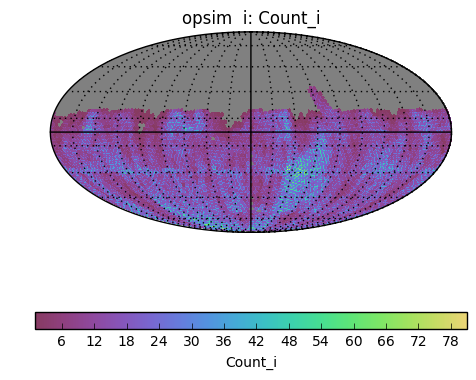

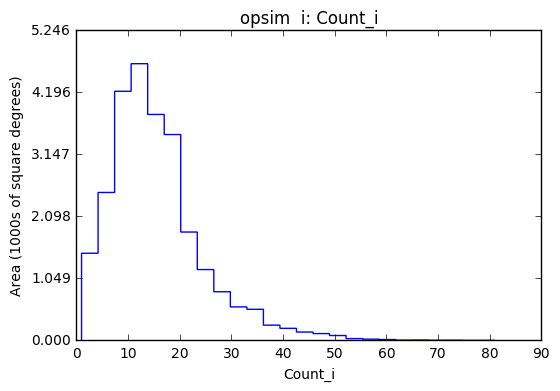

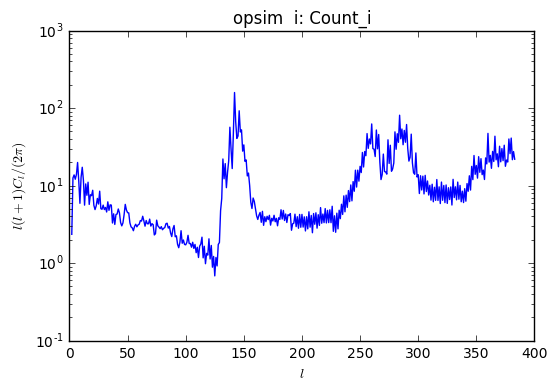

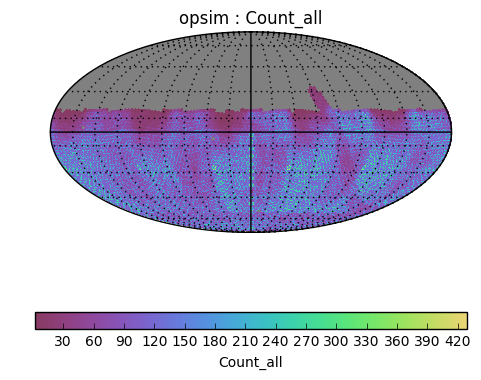

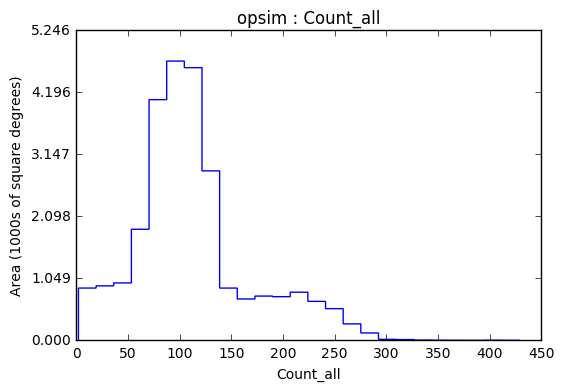

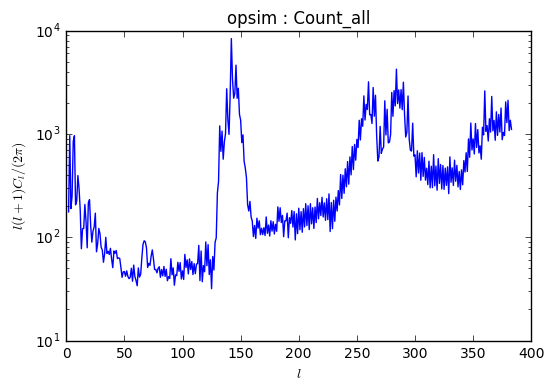

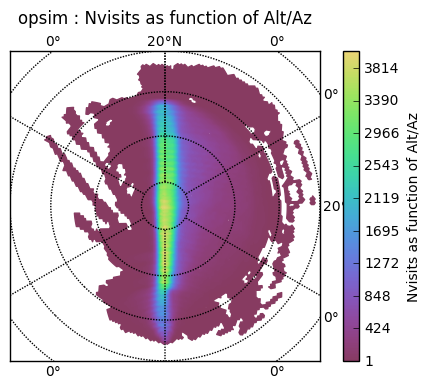

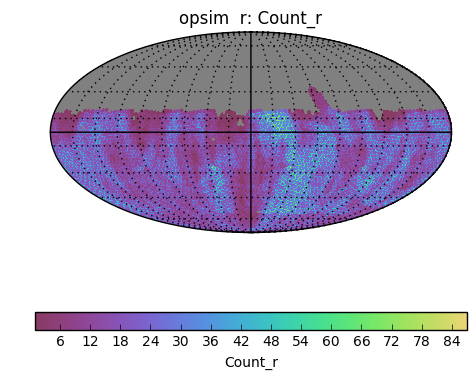

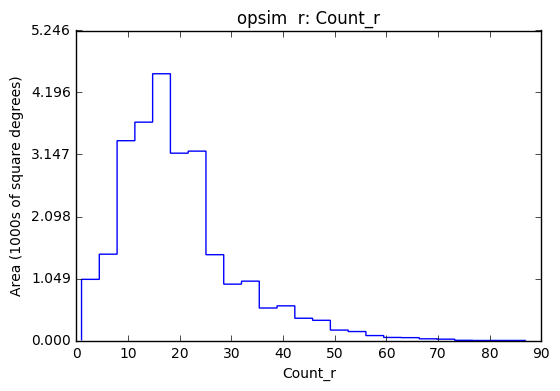

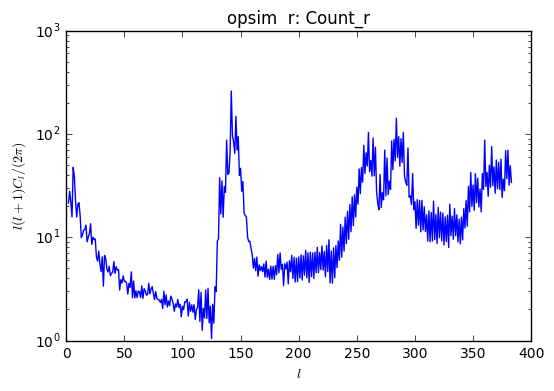

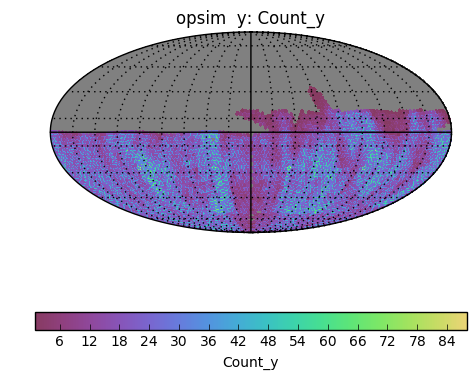

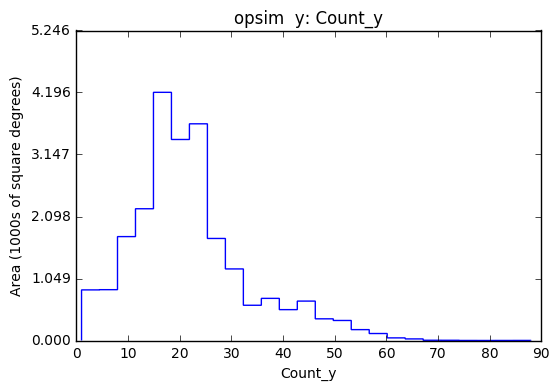

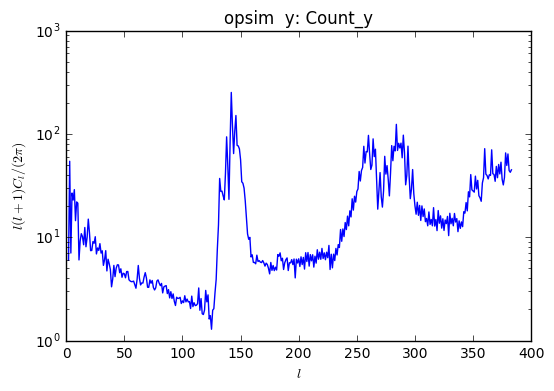

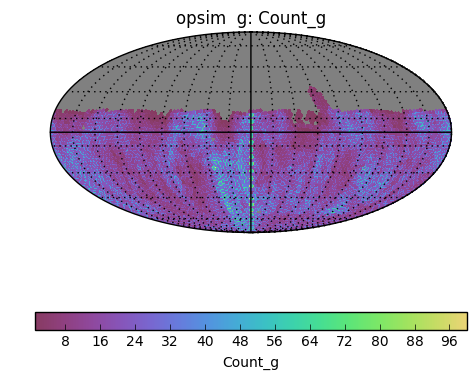

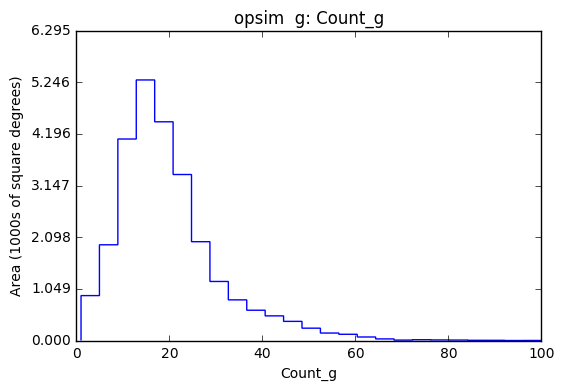

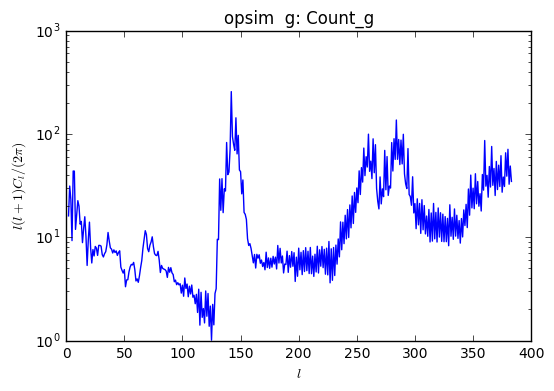

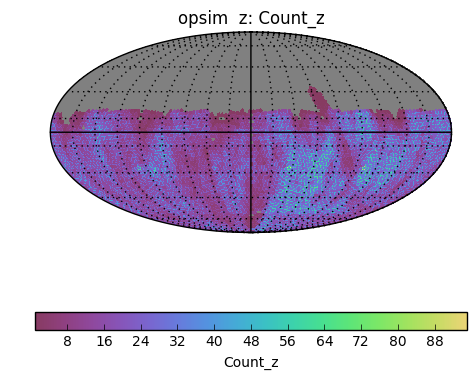

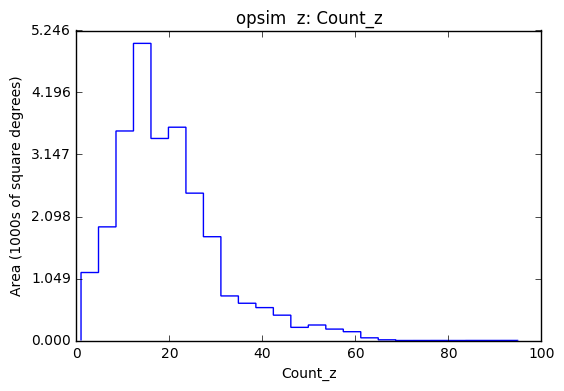

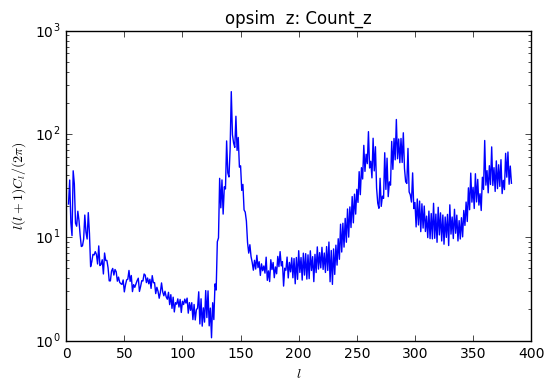

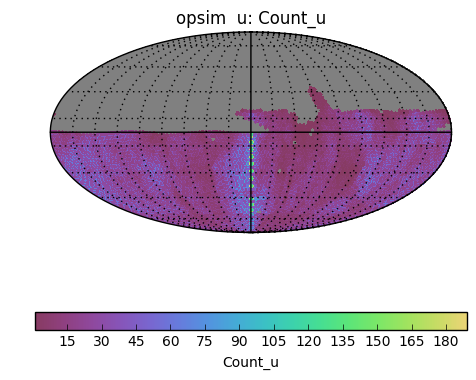

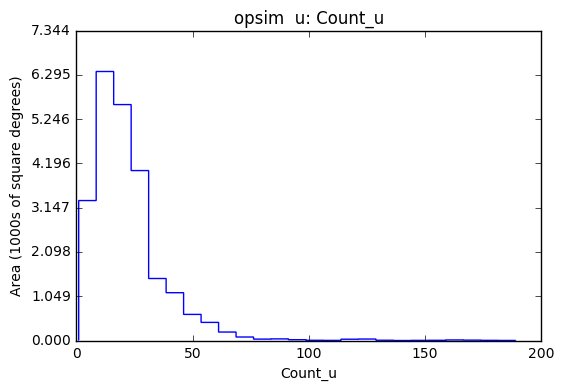

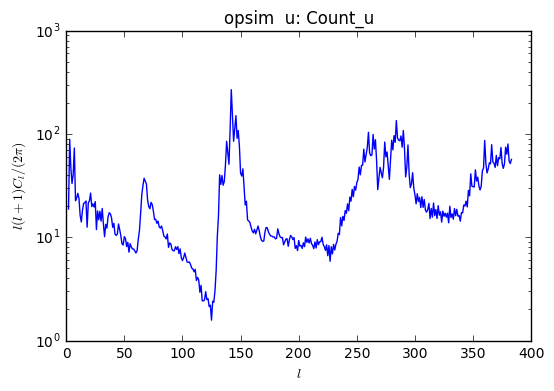

In [6]:
group.plotAll(closefigs=False)